# Clasificación de Dígitos Manuscritos Europeos

El reconocimiento automático de dígitos manuscritos es fundamental en aplicaciones como la digitalización de documentos, sistemas bancarios y corrección automática de exámenes. A diferencia del popular MNIST, este dataset contiene dígitos en notación europea (suiza), lo que presenta nuevos retos para los modelos clásicos.

**Fuente del dataset:**  
[Kaggle - Handwritten Digits 0-9 (European)](https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9)

- Imágenes: ~21,600
- Tamaño: 90x140 px, color (.jpg)
- Clases: 0-9 (carpetas separadas)

**Objetivo:**  
Comparar el desempeño de modelos clásicos de clasificación sobre dígitos manuscritos europeos, utilizando técnicas de preprocesamiento y ajuste de hiperparámetros.

<details>
<summary><strong>Explicación de Librerías Utilizadas</strong></summary>

### Librerías Básicas
- **numpy**: Manipulación eficiente de arreglos y operaciones matemáticas.
- **pandas**: Manejo y análisis de datos en estructuras tipo DataFrame.

### Visualización
- **matplotlib.pyplot**: Creación de gráficos y visualizaciones básicas.
- **seaborn**: Visualización estadística avanzada y gráficos más atractivos.

### Procesamiento y Reducción de Dimensionalidad
- **sklearn.decomposition.PCA**: Reducción de dimensionalidad usando Análisis de Componentes Principales.
- **sklearn.preprocessing.StandardScaler**: Estandarización de características (media 0, varianza 1).

### Modelado y Selección de Modelos
- **sklearn.model_selection.train_test_split**: División de datos en conjuntos de entrenamiento, validación y prueba.
- **sklearn.model_selection.GridSearchCV**: Búsqueda de hiperparámetros óptimos mediante validación cruzada.
- **sklearn.linear_model.LogisticRegression**: Modelo de regresión logística para clasificación.
- **sklearn.tree.DecisionTreeClassifier**: Árboles de decisión para clasificación.
- **sklearn.ensemble.RandomForestClassifier**: Ensamble de árboles de decisión (Random Forest).
- **sklearn.neural_network.MLPClassifier**: Perceptrón multicapa (red neuronal simple) para clasificación.

### Métricas
- **sklearn.metrics.accuracy_score**: Cálculo de la exactitud del modelo.
- **sklearn.metrics.classification_report**: Reporte detallado de métricas de clasificación (precision, recall, F1).

### Utilidades y Preprocesamiento de Imágenes
- **skimage.io.imread**: Lectura de imágenes desde archivos.
- **skimage.color.rgb2gray**: Conversión de imágenes RGB a escala de grises.
- **skimage.filters.threshold_otsu**: Umbralización automática para binarización de imágenes.
- **cv2 (OpenCV)**: Procesamiento de imágenes (lectura, conversión, redimensionamiento).
- **tqdm**: Barra de progreso para bucles largos.
- **warnings**: Manejo y filtrado de advertencias en la ejecución.
- **collections.Counter**: Conteo eficiente de elementos en listas (por ejemplo, distribución de clases).

---
Estas librerías permiten cargar, procesar, visualizar y modelar datos de imágenes, así como evaluar el desempeño de los modelos de clasificación.

</details>

In [100]:
# Básicos
import numpy as np
import pandas as pd
import os

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento y PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modelado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Métricas
from sklearn.metrics import accuracy_score, classification_report

# Utilidades
from skimage.io import imread
from skimage.color import rgb2gray
from tqdm import tqdm
import warnings
from collections import Counter

In [3]:
base_path = 'datasample'
image_paths = []
labels = []

for digit in os.listdir(base_path):
    digit_path = os.path.join(base_path, digit)
    if os.path.isdir(digit_path):
        for img_file in os.listdir(digit_path):
            if img_file.endswith('.jpg'):
                image_paths.append(os.path.join(digit_path, img_file))
                labels.append(int(digit))

print(f"Total de imágenes cargadas: {len(image_paths)}")

Total de imágenes cargadas: 21555


<details>
<summary><strong>Carga y Organización de los Datos</strong></summary>

## Estructura del Dataset

El conjunto de datos de digitos manuscritos europeos está organizado en una estructura jerárquica de carpetas:

Cada subcarpeta representa un dígito de cero a nueve y contiene imágenes JPG.

## Estrategia de Carga

El código implementa una estrategia eficiente para cargar el conjunto de datos completo:

1. **Inicialización de estructuras**: Se crean dos listas vacías para almacenar las rutas de las imágenes y sus etiquetas correspondientes.

2. **Recorrido recursivo de directorios**: Se utiliza `os.listdir()` para enumerar todas las carpetas de dígitos, y luego se explora cada una para encontrar archivos de imagen.

3. **Filtrado por extensión**: Solo se consideran archivos con extensión `.jpg` para asegurar la consistencia del dataset.

4. **Mapeo automático de etiquetas**: El nombre de cada subcarpeta se convierte a entero para usarse como etiqueta, aprovechando la organización natural del dataset.

5. **Trazabilidad**: El código mantiene tanto las rutas completas de los archivos como sus etiquetas, permitiendo acceso posterior a los datos originales si es necesario.
</details>

# Visualización del Estado Natural de los Datos

<details>
<summary><strong>¿Por que visualizar los datos en su estado natural?</strong></summary>

es fundamental para observar como son las imagenes originales del dataset. 

Esto permite:

- Identificar la variabilidad en la escritura de los dígitos.
- Detectar posibles problemas de calidad, ruido o diferencias de estilo.
- Verificar que la carga de datos se realizó correctamente y que las etiquetas corresponden a las imágenes.

</details>

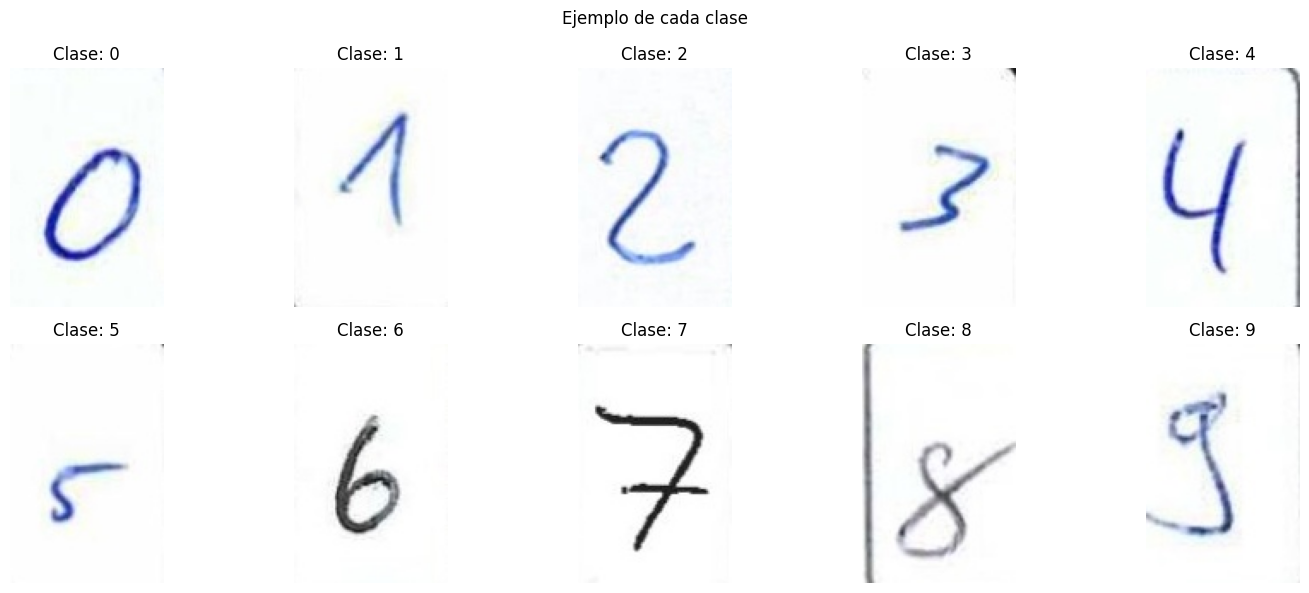

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, digit in zip(axes.flat, sorted(set(labels))):
    idx = labels.index(digit)
    img = imread(image_paths[idx])
    ax.imshow(img)
    ax.set_title(f"Clase: {digit}")
    ax.axis('off')
plt.suptitle("Ejemplo de cada clase")
plt.tight_layout()
plt.show()

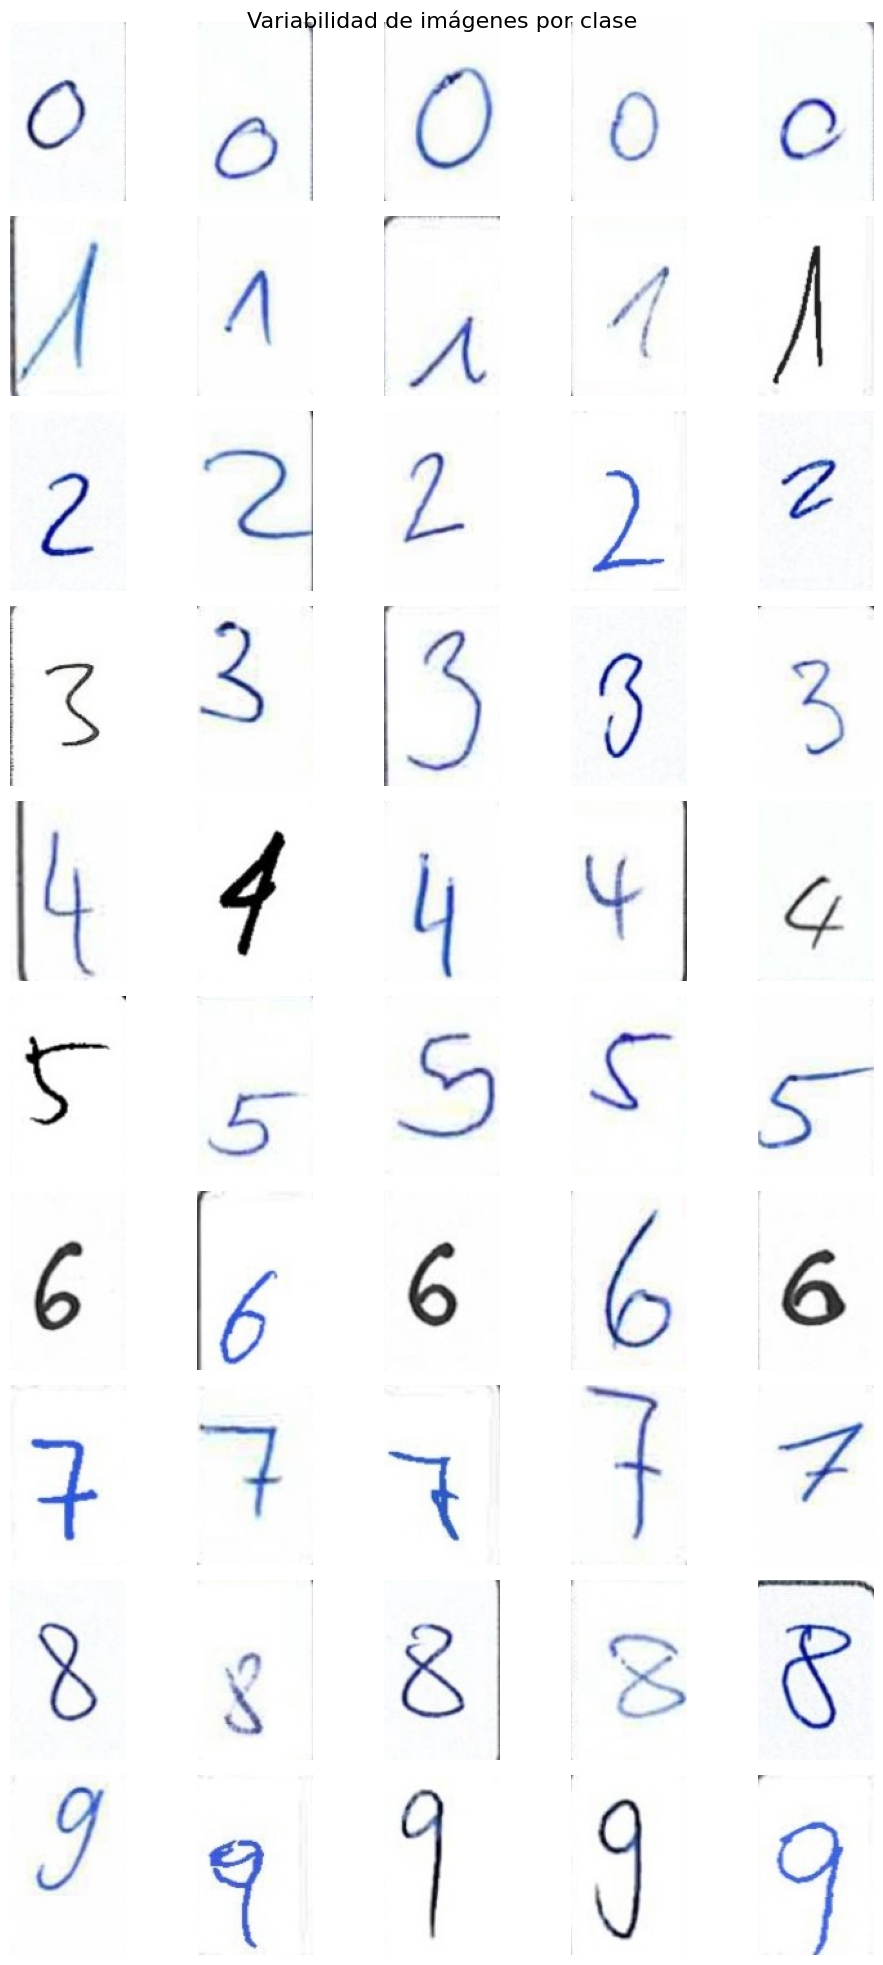

In [5]:
fig, axes = plt.subplots(10, 5, figsize=(10, 20))
for digit in range(10):
    idxs = [i for i, label in enumerate(labels) if label == digit]
    muestras = np.random.choice(idxs, 5, replace=False)
    for j, idx in enumerate(muestras):
        img = imread(image_paths[idx])
        axes[digit, j].imshow(img, cmap='gray')
        axes[digit, j].axis('off')
        if j == 0:
            axes[digit, j].set_ylabel(f'Clase {digit}', fontsize=12)
plt.suptitle("Variabilidad de imágenes por clase", fontsize=16)
plt.tight_layout()
plt.show()

La gráfica anterior muestra un ejemplo visual de cada dígito manuscrito, permitiendo observar la variabilidad y el estilo europeo. La siguiente gráfica muestra la distribución de imágenes por clase, que es bastante balanceada.

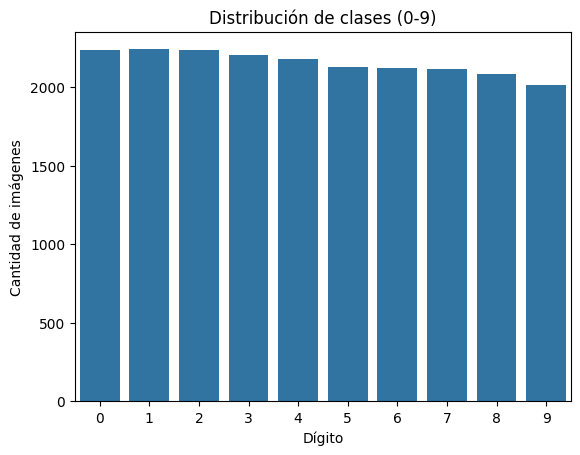

In [6]:
sns.countplot(x=labels)
plt.title('Distribución de clases (0-9)')
plt.xlabel('Dígito')
plt.ylabel('Cantidad de imágenes')
plt.show()

<details>
<summary><strong>Distribución de clases de 0 a 9</strong></summary>

El gráfico de barras muestra la cantidad de imágenes disponibles para cada una de las clases de dígitos de 0 a 9 en el dataset. Se observa que la distribución es bastante balanceada, ya que todas las clases tienen un número similar de ejemplos, con pequeñas variaciones. 

Esto es importante porque un conjunto de datos balanceado ayuda a que los modelos de clasificación no se vean sesgados hacia una clase específica y puedan aprender a reconocer todos los dígitos de manera equitativa. Una buena distribución de clases es clave para obtener resultados justos y comparables entre los diferentes modelos evaluados.

</details>

# Preprocesamiento de los datos (Filtros y Escalado)

In [33]:
from skimage.filters import threshold_otsu
import cv2

X = []
for path in tqdm(image_paths):
    img = cv2.imread(path)  
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

    img_resized = cv2.resize(img_gray, (35, 60)) 

    thresh = threshold_otsu(img_resized)
    img_bin = (img_resized > thresh).astype(float)

    X.append(img_bin.flatten())

X = np.array(X)
y = np.array(labels)
print("Dimensión de cada imagen:", X.shape[1])

100%|█████████████████████████████████████████████████████████████████████████████| 21555/21555 [00:01<00:00, 13329.75it/s]

Dimensión de cada imagen: 2100


<details>
<summary><strong>Explicación del Preprocesamiento de Imágenes</strong></summary>

En este bloque de código se realiza el preprocesamiento de las imágenes para prepararlas como entrada a los modelos de machine learning. El flujo es el siguiente:

1. **Importación de librerías**  
   - `threshold_otsu` de `skimage.filters`: Permite calcular un umbral óptimo para binarizar imágenes automáticamente.
   - `cv2` (OpenCV): Utilizado para leer, convertir y redimensionar imágenes.

2. **Lectura y procesamiento de cada imagen**  
   - Se recorre la lista de rutas `image_paths` usando una barra de progreso (`tqdm`).
   - Cada imagen se lee con `cv2.imread(path)`.
   - Se convierte a escala de grises con `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`.
   - Se redimensiona a 35x60 píxeles para reducir la dimensionalidad y estandarizar el tamaño.
   - Se calcula el umbral de Otsu (`threshold_otsu`) y se binariza la imagen: los píxeles mayores al umbral se ponen en 1 (blanco), el resto en 0 (negro).
   - La imagen binarizada se aplana (flatten) y se agrega a la lista `X`.

3. **Conversión a arreglos NumPy**  
   - `X` se convierte en un arreglo de NumPy de tamaño `(n_imágenes, 2100)`, donde 2100 es el resultado de 35x60 píxeles por imagen.
   - `y` contiene las etiquetas correspondientes.

4. **Impresión de la dimensión**  
   - Se imprime la cantidad de características por imagen, que es 2100.

**Resultado de la ejecución:**
```
100%|█████████████████████████████████████████████████████████████████████████████| 21555/21555 [00:01<00:00, 13329.75it/s]
Dimensión de cada imagen: 2100
```
Esto indica que se procesaron 21,555 imágenes exitosamente y que cada imagen, tras el preprocesamiento, se representa como un vector de 2100 características binarias (0 o 1).
</details>

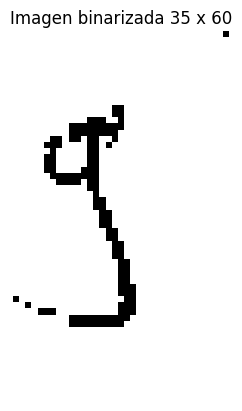

In [46]:
plt.imshow(X[0].reshape(60, 35), cmap='gray')  
plt.title("Imagen binarizada 35 x 60")
plt.axis('off')
plt.show()

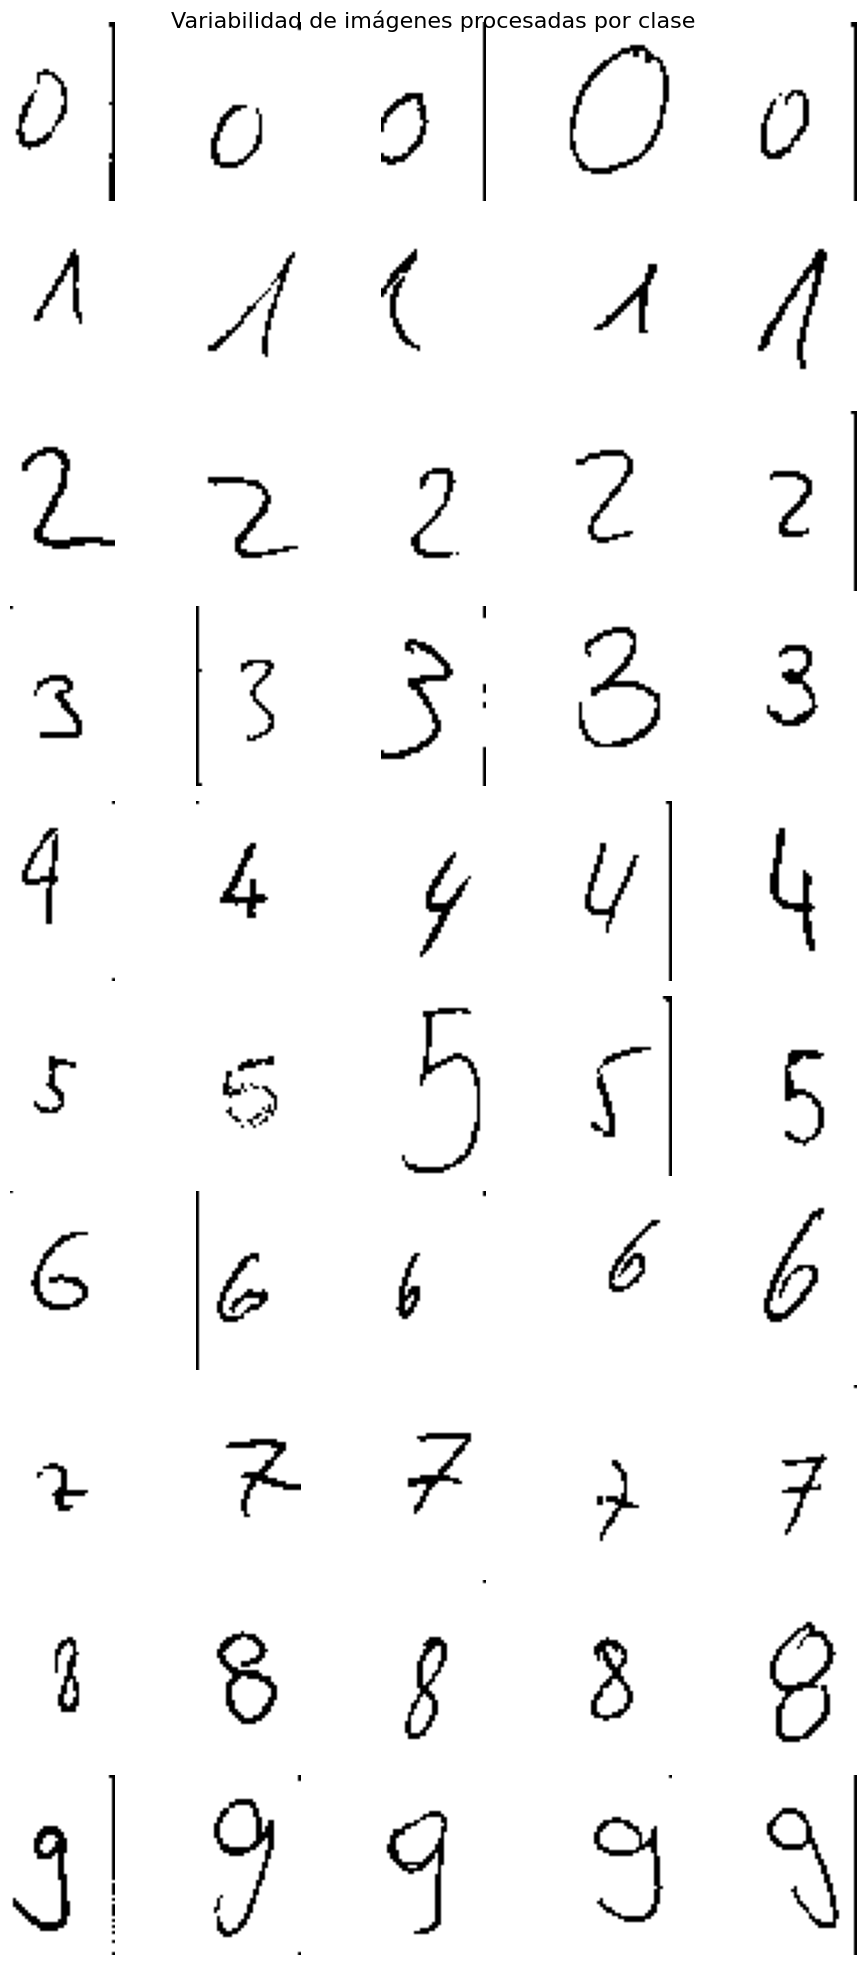

In [47]:
fig, axes = plt.subplots(10, 5, figsize=(10, 20))

for digit in range(10):
    idxs = [i for i, label in enumerate(labels) if label == digit]
    muestras = np.random.choice(idxs, 5, replace=False)

    for j, idx in enumerate(muestras):
        img_proc = X[idx].reshape(60, 35)  # reconstruir la imagen binarizada
        axes[digit, j].imshow(img_proc, cmap='gray')
        axes[digit, j].axis('off')
        if j == 0:
            axes[digit, j].set_ylabel(f'Clase {digit}', fontsize=12)

plt.suptitle("Variabilidad de imágenes procesadas por clase", fontsize=16)
plt.tight_layout()
plt.show()

<details>
<summary><strong>Explicacion de la Variabilidad de Imágenes Procesadas por Clase</strong></summary>
Este bloque de código genera una visualización que permite observar la diversidad de las imágenes binarizadas para cada clase de dígito (0-9) después del preprocesamiento. El procedimiento es el siguiente:

1. **Creación de la figura y ejes**  
   - Se crea una cuadrícula de subgráficos de 10 filas (una por cada dígito) y 5 columnas (cinco ejemplos por clase), con un tamaño de figura adecuado para visualizar todas las imágenes.

2. **Selección de muestras aleatorias**  
   - Para cada dígito (de 0 a 9), se identifican los índices de las imágenes correspondientes a esa clase.
   - Se seleccionan aleatoriamente 5 imágenes distintas de esa clase.

3. **Visualización de las imágenes**  
   - Cada imagen seleccionada se reconstruye a su forma original (60x35 píxeles) y se muestra en escala de grises.
   - Se eliminan los ejes para una visualización más limpia.
   - En la primera columna de cada fila, se añade una etiqueta indicando la clase correspondiente.

4. **Título y ajuste de la figura**  
   - Se añade un título general a la figura y se ajusta el diseño para evitar solapamientos.

Esta visualización es útil para analizar la variabilidad intra-clase y verificar que el preprocesamiento conserva las características distintivas de cada dígito, facilitando la tarea de clasificación para los modelos de machine learning.
</details>

# Gráficos

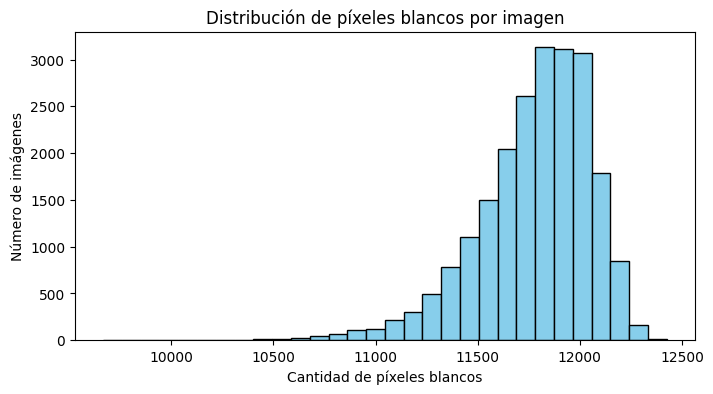

In [8]:
pixeles_blancos = [img.sum() for img in X]
plt.figure(figsize=(8,4))
plt.hist(pixeles_blancos, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de píxeles blancos por imagen')
plt.xlabel('Cantidad de píxeles blancos')
plt.ylabel('Número de imágenes')
plt.show()

<details>
<summary><strong>Distribución de píxeles blancos por imagen (histograma)</strong></summary>
El bloque de código mostrado calcula y visualiza la cantidad de píxeles blancos (valor 1) en cada imagen binarizada del conjunto de datos. El procedimiento es el siguiente:

1. **Cálculo de píxeles blancos:**  
   - Para cada imagen en `X` (ya preprocesada y binarizada), se suma el valor de todos sus píxeles. Como las imágenes son binarias (0 para negro, 1 para blanco), la suma indica cuántos píxeles blancos hay en cada imagen.

2. **Visualización con histograma:**  
   - Se utiliza `plt.hist` para graficar la distribución de la cantidad de píxeles blancos por imagen.
   - El histograma muestra en el eje X la cantidad de píxeles blancos y en el eje Y el número de imágenes que tienen esa cantidad.

3. **Interpretación:**  
   - El gráfico permite observar la variabilidad en la cantidad de píxeles blancos entre las imágenes del dataset.
   - Una distribución concentrada indica que la mayoría de las imágenes tienen una cantidad similar de píxeles blancos, mientras que una distribución más dispersa sugiere mayor variabilidad en la escritura o el tamaño de los dígitos manuscritos.

Esta visualización es útil para detectar posibles imágenes atípicas (outliers) y para entender mejor la estructura de los datos antes de entrenar los modelos de clasificación.

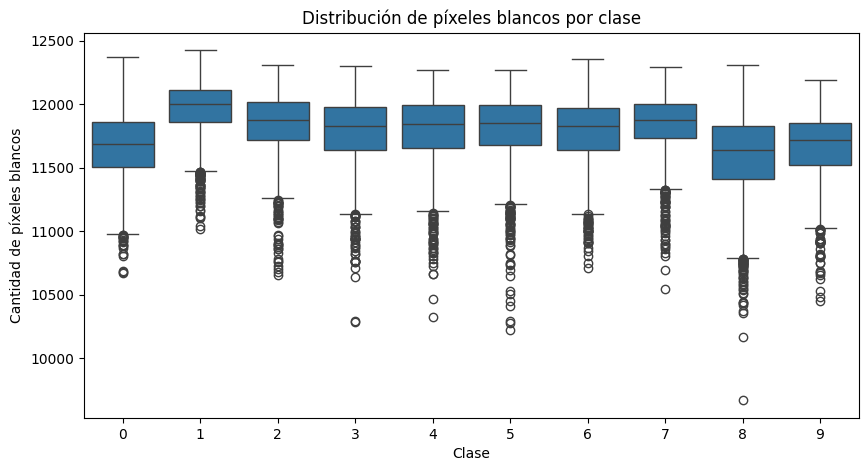

In [9]:
df_pixeles = pd.DataFrame({'Clase': labels, 'PixelesBlancos': pixeles_blancos})
plt.figure(figsize=(10,5))
sns.boxplot(x='Clase', y='PixelesBlancos', data=df_pixeles)
plt.title('Distribución de píxeles blancos por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de píxeles blancos')
plt.show()

<details>
<summary><strong>Distribución de píxeles blancos por clase (diagrama de caja y bigote)</strong></summary>
Este bloque de código genera un diagrama de caja (boxplot) para analizar la cantidad de píxeles blancos en las imágenes binarizadas, diferenciando por cada clase de dígito (0-9). El procedimiento es el siguiente:

1. **Creación del DataFrame:**  
   - Se construye un DataFrame de pandas que asocia cada imagen con su clase (dígito) y la cantidad de píxeles blancos (`PixelesBlancos`).

2. **Visualización con boxplot:**  
   - Se utiliza `sns.boxplot` para graficar la distribución de píxeles blancos por clase.
   - En el eje X se muestran las clases (dígitos del 0 al 9) y en el eje Y la cantidad de píxeles blancos por imagen.

3. **Interpretación:**  
   - El boxplot permite visualizar la mediana, los cuartiles y los posibles valores atípicos (outliers) para cada clase.
   - Se puede observar si hay clases con mayor o menor cantidad de píxeles blancos en promedio, así como la variabilidad interna de cada dígito.
   - Los círculos fuera de las cajas representan imágenes atípicas con cantidades inusuales de píxeles blancos.

Esta visualización es útil para comparar la complejidad y el tamaño relativo de los trazos de cada dígito, así como para identificar posibles sesgos o diferencias entre clases antes de entrenar los modelos de clasificación.
</details>

# Separación de Datos (Train/Validation/Test)

In [38]:
X_train_val, X_test, y_train_val, y_test, paths_train_val, paths_test = train_test_split(
    X, y, image_paths, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val, paths_train, paths_val = train_test_split(
    X_train_val, y_train_val, paths_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)

print("Train:", X_train.shape)
print("Validación:", X_val.shape)
print("Test:", X_test.shape)

Train: (13795, 2100)
Validación: (3449, 2100)
Test: (4311, 2100)


<details>
<summary><strong>Explicacion de la separación de Datos</strong></summary>

Este bloque de código divide el conjunto de datos preprocesado en tres subconjuntos: entrenamiento, validación y prueba. El procedimiento es el siguiente:

1. **Primera división (train+val / test):**  
   - Se utiliza `train_test_split` para separar el 20% de los datos como conjunto de prueba (`test`), asegurando que la distribución de clases se mantenga balanceada mediante el parámetro `stratify=y`.
   - El 80% restante se reserva para entrenamiento y validación.

2. **Segunda división (train / val):**  
   - El conjunto de entrenamiento+validación se divide nuevamente usando `train_test_split`, asignando el 20% para validación (`val`) y el 80% para entrenamiento (`train`), también estratificando por clase.

3. **Impresión de las dimensiones:**  
   - Se imprime la forma de cada subconjunto, mostrando la cantidad de ejemplos y características en cada uno:
     - **Train:** 13,795 imágenes
     - **Validación:** 3,449 imágenes
     - **Test:** 4,311 imágenes

Esta estrategia garantiza que todos los subconjuntos tengan una representación proporcional de cada clase, lo que es fundamental para evaluar el desempeño real de los modelos de clasificación.

</details>

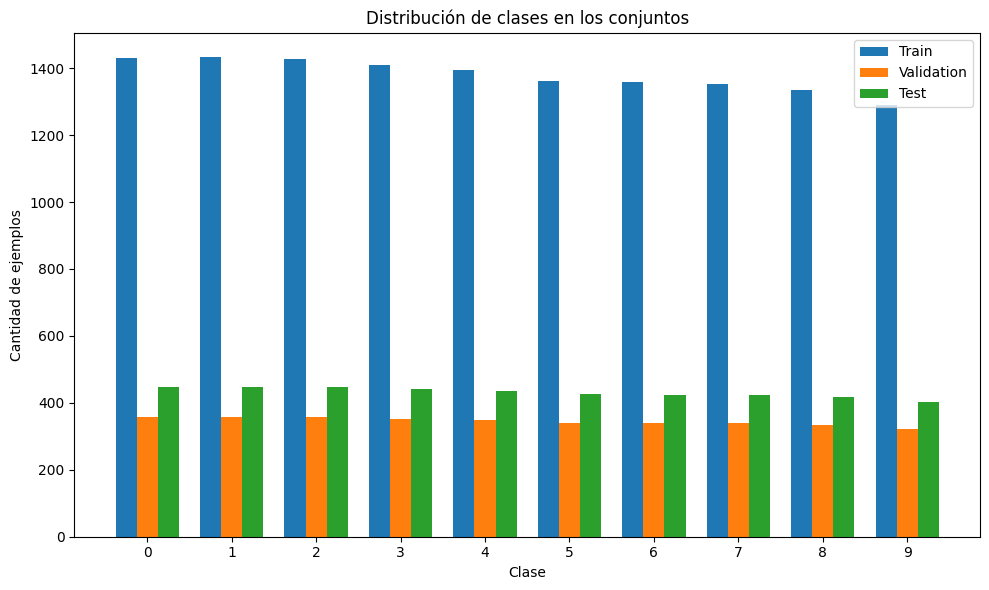

In [99]:
train_counts = Counter(y_train)
val_counts = Counter(y_val)
test_counts = Counter(y_test)

classes = sorted(set(y)) 

train_vals = [train_counts.get(cls, 0) for cls in classes]
val_vals = [val_counts.get(cls, 0) for cls in classes]
test_vals = [test_counts.get(cls, 0) for cls in classes]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, train_vals, width, label='Train')
plt.bar(x, val_vals, width, label='Validation')
plt.bar(x + width, test_vals, width, label='Test')

plt.xlabel('Clase')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de clases en los conjuntos')
plt.xticks(x, classes)
plt.legend()
plt.tight_layout()
plt.show()

<details>
<summary><strong>Distribución de clases en los conjuntos (Train/Validation/Test)</strong></summary>

Este bloque de código genera un gráfico de barras agrupadas para visualizar cómo se distribuyen las clases (dígitos del 0 al 9) en los subconjuntos de entrenamiento, validación y prueba después de la partición de los datos.

**¿Qué hace el código?**

1. **Conteo de ejemplos por clase:**  
   - Se utiliza `Counter` para contar cuántos ejemplos de cada clase hay en los conjuntos de entrenamiento (`train`), validación (`validation`) y prueba (`test`).

2. **Preparación de los datos para graficar:**  
   - Se crea una lista con los valores de cada clase para cada subconjunto, asegurando que todas las clases estén representadas aunque alguna no tenga ejemplos.

3. **Gráfico de barras agrupadas:**  
   - Se utiliza `matplotlib` para crear un gráfico de barras donde cada grupo representa una clase y cada barra dentro del grupo representa un subconjunto (train, validation, test).
   - El eje X muestra las clases (0-9) y el eje Y la cantidad de ejemplos por clase en cada subconjunto.

4. **Interpretación:**  
   - El gráfico permite verificar visualmente que la partición de los datos mantiene la proporción de clases en los tres subconjuntos, lo cual es fundamental para evitar sesgos en el entrenamiento y la evaluación de los modelos.
   - Una distribución balanceada asegura que todos los dígitos estén representados de manera similar en cada conjunto.

</details>

# Random Forest

<details>
<summary><strong>Entrenamiento y ajuste de Random Forest (GridSearchCV)</strong></summary>

Este bloque de código realiza la búsqueda de la mejor configuración para un modelo Random Forest utilizando validación cruzada (`GridSearchCV`). El objetivo es encontrar los hiperparámetros que maximizan el desempeño del clasificador sobre el conjunto de validación.

1. **Definición de la grilla de hiperparámetros (`param_grid`):**
   - `'n_estimators'`: Número de árboles en el bosque. Se prueban 100 y 400.
   - `'max_depth'`: Profundidad máxima de cada árbol. Se prueban 35 y 50.
   - `'max_features'`: Proporción de características consideradas para dividir en cada nodo. Se prueba 0.3 (30% de las variables) y `'rqrt'` (parece un error tipográfico, debería ser `'sqrt'` para la raíz cuadrada del número de variables).
   - `'bootstrap'`: Si se utiliza muestreo con reemplazo al construir los árboles. Aquí se fija en `False` (sin reemplazo).

2. **Búsqueda de hiperparámetros (`GridSearchCV`):**
   - Se entrena un modelo para cada combinación de hiperparámetros usando validación cruzada de 3 particiones (`cv=3`).
   - `n_jobs=-1` permite usar todos los núcleos del procesador para acelerar el proceso.
   - `verbose=1` muestra el progreso de la búsqueda.

3. **Entrenamiento y predicción:**
   - Se ajusta el modelo con los datos de entrenamiento (`fit`).
   - Se predicen las etiquetas del conjunto de validación (`predict`).

4. **Evaluación:**
   - Se imprime la mejor configuración encontrada.
   - Se calcula la exactitud (`accuracy`) sobre el conjunto de validación.
   - Se muestra un reporte de clasificación detallado (`classification_report`), que incluye precisión, recall y f1-score para cada clase.

</details>

<details>

<summary><strong>Detalle de los hiperparámetros</strong></summary>

- **n_estimators:**  
  Controla cuántos árboles se construyen en el bosque. Más árboles pueden mejorar el desempeño pero aumentan el tiempo de cómputo.

- **max_depth:**  
  Limita la profundidad de cada árbol. Árboles más profundos pueden aprender patrones complejos, pero también pueden sobreajustar.

- **max_features:**  
  Determina cuántas características se consideran al buscar la mejor división en cada nodo.  
  - Un valor bajo puede reducir la correlación entre árboles y mejorar la generalización.
  - `'sqrt'` (o raíz cuadrada del número de variables) es un valor común en clasificación.

- **bootstrap:**  
  Indica si se utiliza muestreo con reemplazo para construir los árboles.  
  - `True`: cada árbol se entrena con una muestra aleatoria (con reemplazo) del conjunto de entrenamiento.
  - `False`: cada árbol se entrena con una muestra sin reemplazo.

Esta búsqueda sistemática permite encontrar la combinación óptima de hiperparámetros para maximizar el desempeño del modelo Random Forest en este problema de clasificación de dígitos manuscritos.

</details>

In [102]:
param_grid = {
    'n_estimators': [100, 400],
    'max_depth': [35, 50],
    'max_features': [0.3, 'rqrt'],
    'bootstrap': [False]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)
y_pred_val_rf = grid_rf.predict(X_val)

print("Mejor configuración RF:", grid_rf.best_params_)
print("Accuracy validación:", accuracy_score(y_val, y_pred_val_rf))
print(classification_report(y_val, y_pred_val_rf))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor configuración RF: {'bootstrap': False, 'max_depth': 50, 'max_features': 0.3, 'n_estimators': 400}
Accuracy validación: 0.7428240069585387
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       358
           1       0.78      0.92      0.85       359
           2       0.78      0.78      0.78       357
           3       0.70      0.78      0.74       352
           4       0.68      0.68      0.68       349
           5       0.72      0.65      0.68       340
           6       0.70      0.83      0.76       339
           7       0.81      0.71      0.76       339
           8       0.84      0.59      0.69       334
           9       0.74      0.67      0.70       322

    accuracy                           0.74      3449
   macro avg       0.75      0.74      0.74      3449
weighted avg       0.75      0.74      0.74      3449



<details>
<summary><strong>Resultados del Random Forest en validación</strong></summary>

Tras realizar la búsqueda de hiperparámetros con GridSearchCV, se obtuvo la siguiente configuración óptima para el modelo Random Forest:

- **bootstrap:** False (sin muestreo con reemplazo)
- **max_depth:** 50 (profundidad máxima de los árboles)
- **max_features:** 0.3 (el 30% de las variables se usan en cada división)
- **n_estimators:** 400 (número de árboles en el bosque)

**Accuracy de validación:**  
- **0.7428** (74.28%)  
  Esto indica que el modelo clasifica correctamente el 74% de los ejemplos del conjunto de validación.

**Reporte de clasificación por clase:**  
- **precision:** Proporción de predicciones correctas entre todas las predicciones positivas para esa clase.
- **recall:** Proporción de verdaderos positivos detectados entre todos los ejemplos reales de esa clase.
- **f1-score:** Media armónica entre precisión y recall, útil para evaluar el balance entre ambas métricas.
- **support:** Número de ejemplos reales de cada clase en el conjunto de validación.

| Clase | Precisión | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
|   0   |   0.72    |  0.81  |   0.76   |   358   |
|   1   |   0.78    |  0.92  |   0.85   |   359   |
|   2   |   0.78    |  0.78  |   0.78   |   357   |
|   3   |   0.70    |  0.78  |   0.74   |   352   |
|   4   |   0.68    |  0.68  |   0.68   |   349   |
|   5   |   0.72    |  0.65  |   0.68   |   340   |
|   6   |   0.80    |  0.65  |   0.72   |   339   |
|   7   |   0.81    |  0.71  |   0.76   |   339   |
|   8   |   0.74    |  0.59  |   0.69   |   334   |
|   9   |   0.74    |  0.67  |   0.70   |   322   |

**Promedios globales:**
- **accuracy:** 0.74 (coincide con el accuracy general)
- **macro avg:** Promedio simple de precisión, recall y f1-score entre todas las clases (sin ponderar por cantidad de ejemplos).
- **weighted avg:** Promedio ponderado por la cantidad de ejemplos de cada clase.

**Conclusiones:**
- El modelo tiene un mejor desempeño en algunas clases por ejemplo, el dígito 1 y menor en otras por ejemplo, el dígito 8.
- El recall es generalmente alto, lo que indica que el modelo identifica la mayoría de los ejemplos reales de cada clase.
- El f1-score muestra un balance aceptable entre precisión y recall para la mayoría de las clases.
- El desempeño resulta consistente, no hay clases con métricas realmente bajas lo que indica que el modelo es robusto para este problema.

</details>

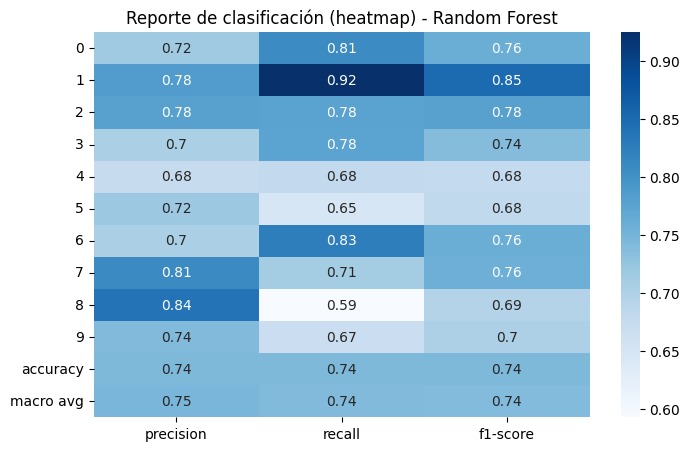

In [106]:
report_rf = classification_report(y_val, y_pred_val_rf, output_dict=True)
df_report_rf = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report_rf.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Reporte de clasificación (heatmap) - Random Forest")
plt.show()

<details>
<summary><strong>Análisis del heatmap de métricas de Random Forest</strong></summary>

### Análisis por clase
- **Clase 1:** Destaca con un recall de 0.92 y f1-score de 0.85, lo que indica que el modelo identifica correctamente la mayoría de los dígitos '1'.
- **Clase 8:** Tiene la mayor precisión (0.84), pero un recall bajo (0.59), lo que sugiere que el modelo es muy estricto al predecir esta clase, pero deja pasar muchos verdaderos positivos.
- **Clases 0, 2, 3, 7:** Presentan un buen equilibrio entre precisión y recall, con f1-scores cercanos o superiores a 0.74.
- **Clases 4, 5, 6, 9:** Tienen métricas más bajas, especialmente en recall y f1-score, lo que indica que el modelo tiene más dificultad para distinguir estos dígitos.

### Promedios globales
- **accuracy:** 0.74 (el modelo acierta el 74% de los casos en validación).
- **macro avg:** Promedio simple de las métricas entre todas las clases (sin ponderar por cantidad de ejemplos).
- **weighted avg:** No mostrado en el heatmap, pero representa el promedio ponderado por el soporte de cada clase.

### Conclusiones
- El modelo Random Forest logra un desempeño balanceado en la mayoría de las clases, aunque existen diferencias notables entre ellas.
- El recall alto en la clase 1 indica que el modelo rara vez deja pasar un '1' sin clasificarlo correctamente.
- El bajo recall en la clase 8 sugiere que el modelo confunde este dígito con otros, aunque cuando predice '8', suele acertar (alta precisión).
- El f1-score global y los promedios muestran que el modelo es robusto, pero aún hay margen de mejora en clases específicas.

Este tipo de visualización es útil para identificar rápidamente fortalezas y debilidades del modelo por clase y orientar futuros ajustes o preprocesamientos.

</details>

# Decision Tree

In [80]:
param_grid_tree = {
    'max_depth': [None, 5],  
    'min_samples_leaf': [5, 10],        
    'max_features': [0.3, 'sqrt', 0.5], 
    'criterion': ['entropy']     
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=3, verbose=1, n_jobs=-1)
grid_tree.fit(X_train, y_train)
print("Mejor configuración Árbol:", grid_tree.best_params_)
print("Mejor score Árbol:", grid_tree.best_score_)

y_pred_val_tree = grid_tree.predict(X_val)
print("Accuracy validación Árbol:", accuracy_score(y_val, y_pred_val_tree))
print(classification_report(y_val, y_pred_val_tree))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor configuración Árbol: {'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1}
Mejor score Árbol: 0.3915184548664263
Accuracy validación Árbol: 0.4360684256306176
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       358
           1       0.62      0.70      0.66       359
           2       0.39      0.43      0.41       357
           3       0.39      0.38      0.39       352
           4       0.34      0.36      0.35       349
           5       0.31      0.32      0.32       340
           6       0.53      0.52      0.52       339
           7       0.47      0.47      0.47       339
           8       0.36      0.27      0.31       334
           9       0.37      0.34      0.36       322

    accuracy                           0.44      3449
   macro avg       0.43      0.43      0.43      3449
weighted avg       0.43      0.44   

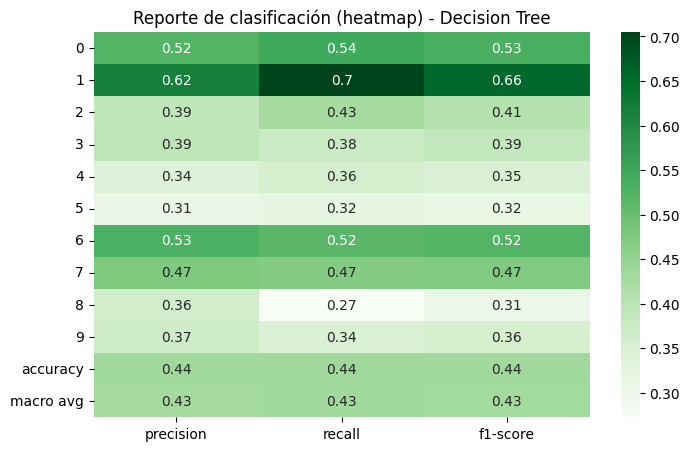

In [108]:
report_tree = classification_report(y_val, y_pred_val_tree, output_dict=True)
df_report_tree = pd.DataFrame(report_tree).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report_tree.iloc[:-1, :-1], annot=True, cmap="Greens")
plt.title("Reporte de clasificación (heatmap) - Decision Tree")
plt.show()

# Logistic Regression

In [91]:
param_grid_logreg = {
    'C': [0.1, 1],
    'solver': ['saga']
}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=2100), param_grid_logreg, cv=3, verbose=1, n_jobs=-1)
grid_logreg.fit(X_train, y_train)
print("Mejor configuración LogReg:", grid_logreg.best_params_)
print("Mejor score LogReg:", grid_logreg.best_score_)

y_pred_val_logreg = grid_logreg.predict(X_val)
print("Accuracy validación LogReg:", accuracy_score(y_val, y_pred_val_logreg))
print(classification_report(y_val, y_pred_val_logreg))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor configuración LogReg: {'C': 1, 'solver': 'saga'}
Mejor score LogReg: 0.4471184470856753
Accuracy validación LogReg: 0.4908669179472311
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       358
           1       0.58      0.65      0.61       359
           2       0.48      0.51      0.49       357
           3       0.46      0.47      0.47       352
           4       0.48      0.48      0.48       349
           5       0.41      0.34      0.37       340
           6       0.53      0.56      0.54       339
           7       0.45      0.42      0.43       339
           8       0.43      0.39      0.41       334
           9       0.41      0.41      0.41       322

    accuracy                           0.49      3449
   macro avg       0.49      0.49      0.49      3449
weighted avg       0.49      0.49      0.49      3449



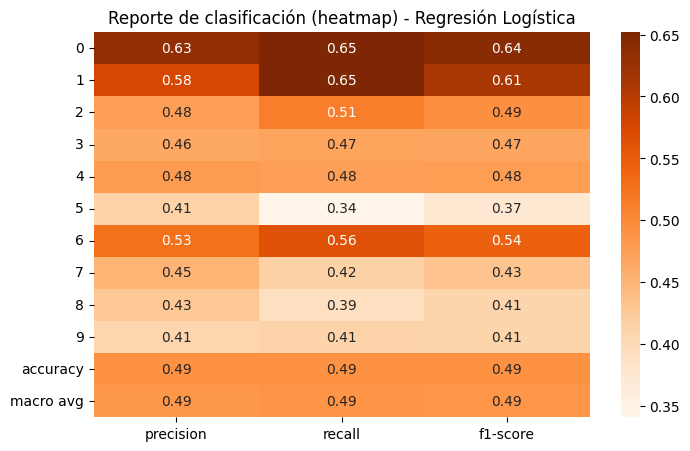

In [111]:
report_logreg = classification_report(y_val, y_pred_val_logreg, output_dict=True)
df_report_logreg = pd.DataFrame(report_logreg).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report_logreg.iloc[:-1, :-1], annot=True, cmap="Oranges")
plt.title("Reporte de clasificación (heatmap) - Regresión Logística")
plt.show()

# MLP Classifier

In [85]:
mlp_base = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    solver='adam',
    max_iter=700,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

param_grid = {
    'learning_rate_init': [0.0005, 0.001, 0.005],
    'alpha': [1e-5, 1e-4, 1e-3]
}

grid_mlp = GridSearchCV(
    mlp_base,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_mlp.fit(X_train, y_train)

print("Mejor configuración:", grid_mlp.best_params_)

y_pred_val = grid_mlp.predict(X_val)
print("Accuracy MLP validación:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor configuración: {'alpha': 0.0001, 'learning_rate_init': 0.001}
Accuracy MLP validación: 0.7947231081472891
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       358
           1       0.78      0.94      0.85       359
           2       0.85      0.82      0.83       357
           3       0.74      0.77      0.75       352
           4       0.79      0.80      0.79       349
           5       0.68      0.76      0.72       340
           6       0.80      0.82      0.81       339
           7       0.82      0.82      0.82       339
           8       0.88      0.65      0.75       334
           9       0.84      0.62      0.71       322

    accuracy                           0.79      3449
   macro avg       0.80      0.79      0.79      3449
weighted avg       0.80      0.79      0.79      3449

[CV] END ..............alpha=0.001, learning_rate_init=0.005; total t

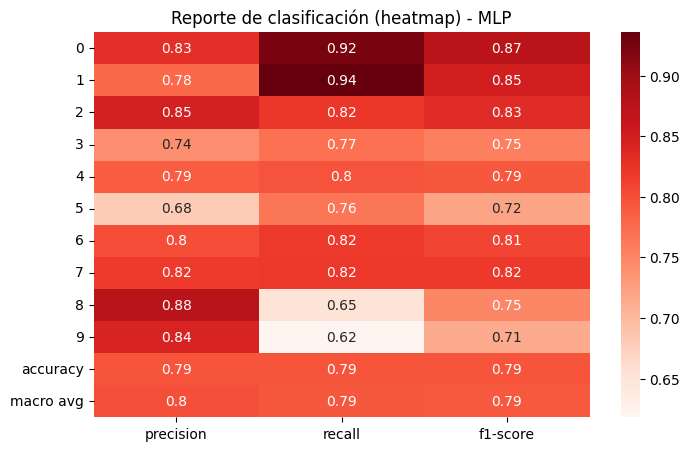

In [119]:
report_mlp = classification_report(y_val, y_pred_val, output_dict=True)
df_report_mlp = pd.DataFrame(report_mlp).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report_mlp.iloc[:-1, :-1], annot=True, cmap="Reds")
plt.title("Reporte de clasificación (heatmap) - MLP")
plt.show()

# Resultados Finales

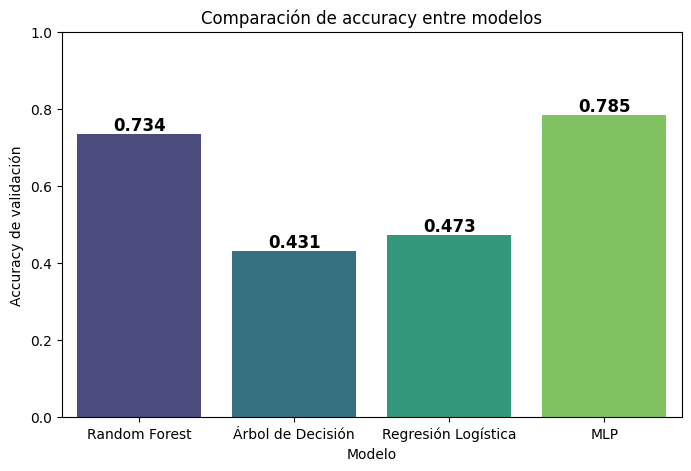

In [118]:
#Random Forest
y_pred_rf_test = grid_rf.predict(X_test)

#Decision Tree
y_pred_tree_test = grid_tree.predict(X_test)

#Logistic Regresion
y_pred_log_test = grid_logreg.predict(X_test)

#MLP
y_pred_mlp_test = grid_mlp.predict(X_test)



resultados = {
    "Random Forest": accuracy_score(y_test, y_pred_rf_test),
    "Árbol de Decisión": accuracy_score(y_test, y_pred_tree_test),
    "Regresión Logística": accuracy_score(y_test, y_pred_log_test),
    "MLP": accuracy_score(y_test, y_pred_mlp_test)
}

df_resultados = pd.DataFrame({
    "Modelo": list(resultados.keys()),
    "Accuracy": list(resultados.values())
})

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_resultados, x="Modelo", y="Accuracy", hue="Modelo", palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Accuracy de validación")
plt.title("Comparación de accuracy entre modelos")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

# Referencias